In [1]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imageio as io
import os

In [2]:
#Loading Data
origdata = pd.read_csv("Iris.csv")
origdata[:10]

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

In [3]:
#choosinf 2 features
k1, k2 = 'PetalLengthCm', 'PetalWidthCm'
data = origdata[[k1, k2, 'Species']].copy()
data[:10]

PetalLengthCm  PetalWidthCm      Species
0            1.4           0.2  Iris-setosa
1            1.4           0.2  Iris-setosa
2            1.3           0.2  Iris-setosa
3            1.5           0.2  Iris-setosa
4            1.4           0.2  Iris-setosa
5            1.7           0.4  Iris-setosa
6            1.4           0.3  Iris-setosa
7            1.5           0.2  Iris-setosa
8            1.4           0.2  Iris-setosa
9            1.5           0.1  Iris-setosa

In [4]:
#changing labels to 0,1,2
X = data[[k1, k2]]
y = data['Species']
print('Classes:')
print(y.unique(), '\n\n\n')

y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2

Classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 





/tmp/ipykernel_130620/2791059201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-setosa'] = 0
/tmp/ipykernel_130620/2791059201.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-versicolor'] = 1
/tmp/ipykernel_130620/2791059201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-virginica'] = 2


In [5]:
9
plt.figure()
setosa = y == 0
versicolor = y == 1
virginica = y == 2

plt.scatter(X[k1][versicolor], X[k2][versicolor], c='r')
plt.scatter(X[k1][virginica], X[k2][virginica], c='c')
plt.xlabel(k1)
plt.ylabel(k2)
plt.show()

In [6]:
#Iris setosa Discarded
X1 = X[y != 0]
y1 = y[y != 0]
X1[:5]

PetalLengthCm  PetalWidthCm
50            4.7           1.4
51            4.5           1.5
52            4.9           1.5
53            4.0           1.3
54            4.6           1.5

In [7]:
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y1 -= 1
print(y1.unique())
X1[:5]

[0 1]


PetalLengthCm  PetalWidthCm
0            4.7           1.4
1            4.5           1.5
2            4.9           1.5
3            4.0           1.3
4            4.6           1.5

In [8]:

fig = plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c')

plt.xlabel(k1)
plt.ylabel(k2)
fig.savefig('main.jpg', dpi=100)
plt.show() 

In [9]:
#Plotting Decision Boundary
y1 = y1.astype(dtype=np.uint8)
clf0 = LinearSVC()
clf0.fit(X1, y1)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
print(clf0.coef_)
print(clf0.intercept_)

xmin, xmax = X1[k1].min(), X1[k1].max()
ymin, ymax = X1[k2].min(), X1[k2].max()
stepx = (xmax - xmin)/99
stepy = (ymax - ymin)/99
a0, b0, c0 = clf0.coef_[0, 0], clf0.coef_[0, 1], clf0.intercept_
# Formula for reference
# a*x + b*y + c = 0
# y = -(a*x + c)/b

lx0 = [xmin + stepx * i for i in range(100)]
ly0 = [-(a0*lx0[i] + c0)/b0 for i in range(100)]

plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c')

plt.plot(lx0, ly0, c='m')

plt.xlabel(k1)
plt.ylabel(k2)

plt.show()

[[0.28014996 1.7009781 ]]
[-4.17110603]


# ACTIVE LEARNING

In [10]:
"""
Now, we split the dataset into two parts — pool(80%) and test(20%).
We use a random state of 1. The split of the dataset is dependent on the random state.
(I have done simulations for 5 iterations of active learning after a random state of 1 
and for 20 iterations of the active learning algorithm after a random state of 2).


"""
X_pool, X_test, y_pool, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_pool, X_test, y_pool, y_test = X_pool.reset_index(drop=True), X_test.reset_index(drop=True), y_pool.reset_index(drop=True), y_test.reset_index(drop=True)
# random state 1 5 iterations
# random state 2 20 iterations


In [11]:
clf0.decision_function(X_pool.iloc[6:8])

array([1.67819399, 0.12130654])

In [16]:
""""
The function find_most_ambiguous gives the point that is the most ambiguous for the classifier. 
For an SVM classifier, if a data point is closer to the decision boundary and less ambiguous
if the data point is farther from the decision boundary no matter which side of the decision boundary
the point is on.Thus, find_most_ambiguous, gives the unlabelled point that is the closest to 
the decision boundary.
""""

def find_most_ambiguous(clf, unknown_indexes):
    
    ind = np.argmin(np.abs( 
        list(clf0.decision_function(X_pool.iloc[unknown_indexes]) )
        ))
    return unknown_indexes[ind]

In [17]:
"""The function, plot_svm, is used to plot the following:
SVM decision boundary, the data points from the train data according to their class, and the data points in the unknown pool of samples.
clf- classifier (trained SVM model).
train_indexes- Indexes of the dataset that are the train data points.
unknown_indexes- Indexes of the dataset that are the unlabelled pool data points.
title- The title of the plot.
name- the name of the image file that when the plot is saved to a file.
new_index- This is the index of the most ambiguous point in the unlabelled pool

In this function, first, we get the train data (X_train, y_train)and the unlabelled data (X_unk, y_unk) from the train_indexes and unknown_indexes, respectively.
We plot all the unlabelled points from the pool in black. Then, we plot all the points from the train data in different colours (red and cyan) as per their class labels. We get the coefficients of the decision boundary (straight line) from the clf.coef_ and clf.intercept. Using this and the formula of a straight line, we plot this line (dashed green line). We also have the ideal decision boundary calculated earlier. This line is also plotted (in magenta).
Finally, we plot the new_index point, that is, the most ambiguous point (yellow star)."""

def plot_svm(clf, train_indexes, unknown_indexes, new_index = False, title = False, name = False):
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]

    X_unk = X_pool.iloc[unknown_indexes]

    if new_index:
        X_new = X_pool.iloc[new_index]

    a, b, c = clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_
    # Straight Line Formula
    # a*x + b*y + c = 0
    # y = -(a*x + c)/b

    lx = [xmin + stepx * i for i in range(100)]
    ly = [-(a*lx[i] + c)/b for i in range(100)]

    fig = plt.figure(figsize=(9,6))

    # plt.scatter(x[k1][setosa], x[k2][setosa], c='r')
    plt.scatter(X_unk[k1], X_unk[k2], c='k', marker = '.')
    plt.scatter(X_train[k1][y_train==0], X_train[k2][y_train==0], c='r', marker = 'o')
    plt.scatter(X_train[k1][y_train==1], X_train[k2][y_train==1], c='c', marker = 'o')
    

    plt.plot(lx, ly, c='m')
    plt.plot(lx0, ly0, '--', c='g')

    if new_index:
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)

    if title:
        plt.title(title)
    
    plt.xlabel(k1)
    plt.ylabel(k2)

    if name:
        fig.set_size_inches((9,6))
        plt.savefig(name, dpi=100)

    plt.show()

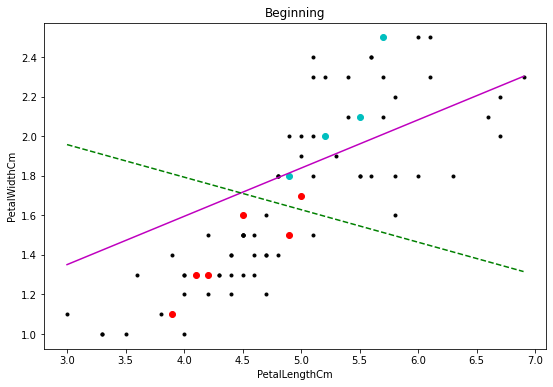

In [18]:
"""
We take the first 10 indexes/data points of the pool as the initial train data and the rest 70 points
as the unlabelled samples. We create the beginning plot with all the unlabelled samples,
the ideal decision boundary and the 10 train data points.
Then, we train an SVM on the train data, and we find the most ambiguous point and 
create a new plot (“Iteration 0”) with this point as a yellow star and also plot the decision boundary 
of the trained SVM.
"""


train_indexes = list(range(10))
unknown_indexes = list(range(10, 80))
X_train = X_pool.iloc[train_indexes]
y_train = y_pool.iloc[train_indexes]
clf = LinearSVC()
clf.fit(X_train, y_train)

# folder = "rs1it5/"
folder = "rs2it20/"
# folder = "rs1it20/"

try:
    os.mkdir(folder)
except:
    pass

filenames = ["ActiveLearningTitleSlide2.jpg"] * 2

title = "Beginning"
# name = folder + ("rs1it5_0a.jpg")
name = folder + ("rs2it20_0a.jpg")
plot_svm(clf, train_indexes, unknown_indexes, False, title, name)

filenames.append(name)

n = find_most_ambiguous(clf, unknown_indexes)
unknown_indexes.remove(n)

title = "Iteration 0"
name = folder + ("rs1it5_0b.jpg")
# name = folder + ("rs2it20_0b.jpg")
filenames.append(name)
plot_svm(clf, train_indexes, unknown_indexes, n, title, name)

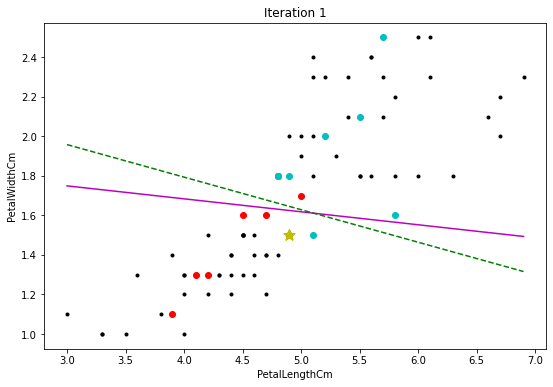

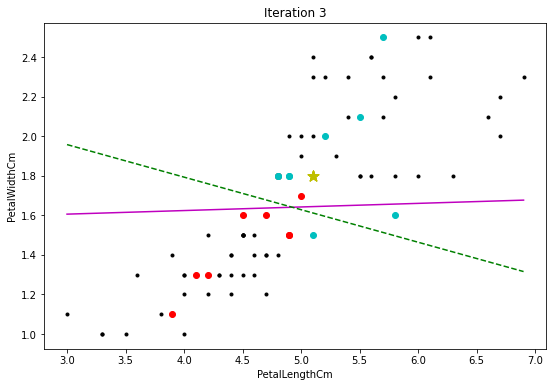

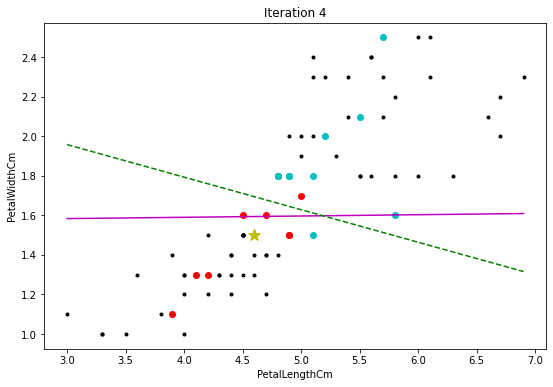

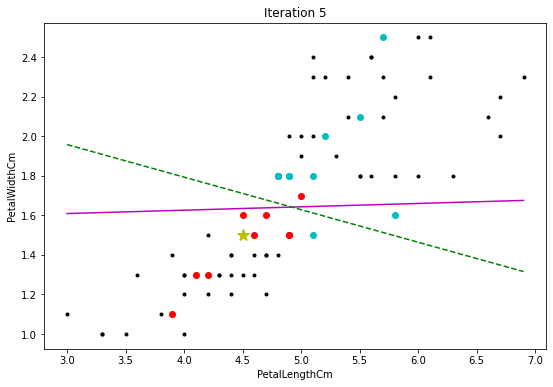

In [20]:
"""
Next, we run the active learning algorithm for 5 iterations. 
In each of them, we add the most ambiguous point to the training data and train an SVM, 
find the most unambiguous point at this stage and then create a plot all this.
"""
"""
Kindly note that in some of the above code blocks and in the below code blocks, 
there are some commented lines with the number 20. This is for running 20 iterations instead of 5 iterations. 
To run this, we have to comment all of the lines with 5 and uncomment all of the lines with 20.
"""


num = 5
#num = 20
t = []
for i in range(num):
    
    train_indexes.append(n)
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    title, name = "Iteration "+str(i+1), folder + ("rs1it5_%d.jpg" % (i+1))
    # title, name = "Iteration "+str(i+1), folder + ("rs2it20_%d.jpg" % (i+1))

    n = find_most_ambiguous(clf, unknown_indexes)
    unknown_indexes.remove(n)
    plot_svm(clf, train_indexes, unknown_indexes, n, title, name)
    filenames.append(name)
    
    
    
